## Finding The Two Best Markets To Advertise e-Learning course on Programming

In this project we will assume that we're working for an an e-learning company that offers courses on programming. Most of the couses we offer are focused towards learning web and mobile development with a selection of courses geared towards other domains such as data science, gamming etc.

The goal of the project is to find the best two markets to advertise our courses in.

### Exploring Data Options

We could organise surveys to collect data for our analysis, however this can be time consuming and expensive. A cheaper alternative is to find data that already exist.

Fortunately, freeCodeCamp a free online e-learning platform that offers courses on web development, made publicly available the data from a survey they ran in 2017 to understand the demographics and interests of coders who have been coding for less than five years. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

You can access the data from their [GitHub repository here.](https://github.com/freeCodeCamp/2017-new-coder-survey)

First lets read in the data and view the first five rows to get a better understanding of the columns in the dataset. 

In [1]:
import pandas as pd

direct_link = 'https://github.com/freeCodeCamp/2017-new-coder-survey/raw/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'

#low_memory = False to silence DtypeWarning.

coders_survey = pd.read_csv(direct_link, low_memory=False)
print("shape: {}".format(coders_survey.shape))
print('\n')

pd.options.display.max_columns = 150 # to avoid truncated output
print(coders_survey.head())

shape: (18175, 136)


    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0      

Most column names are self-explanatory, but it seems that we don't have clear documentation explaining each column name. However, you can find more information in the raw-data folder of the repository we mentioned above — you can find the initial survey questions, and from there it should be easy to infer what each column describes.

Let's read in and view the questions used in the survey

In [2]:
quest_pt1_link = "https://github.com/freeCodeCamp/2017-new-coder-survey/raw/master/raw-data/2017-new-coder-survey-part-1.csv"
quest_pt2_link = "https://github.com/freeCodeCamp/2017-new-coder-survey/raw/master/raw-data/2017-new-coder-survey-part-2.csv"

questions_pt1 = pd.read_csv(quest_pt1_link)
questions_pt2 = pd.read_csv(quest_pt2_link, low_memory=False)

for line in list(questions_pt1.columns):
    if line.endswith('?'):
        print(line)
        
for line in list(questions_pt2.columns):
    if line.endswith('?'):
        print(line)

Are you already working as a software developer?
Is this your first software development job?
Before you got this job, how many months did you spend looking for a job?
When do you plan to start applying for developer jobs?
About how much money do you expect to earn per year at your first developer job (in US Dollars)?
Are you willing to relocate for a job?
About how many hours do you spend learning each week?
About how many months have you been programming for?
Have you attended a full-time coding bootcamp?
Which one?
Have you finished yet?
Did you take out a loan to pay for the bootcamp?
Based on your experience, would you recommend this bootcamp to your friends?
Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?
How old are you?
What's your gender?
Which country are you a citizen of?
Which country do you currently live in?
About how many people live in your city?
Are you an ethnic minority in your country?
Which language do 

### Is our Sample a Good Representaion for our Population?

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data, we need to clarify whether it's representative for our population of interest; has the right categories of people for our purpose.

The JobRoleInterest column describes for every participant the role(s) they'd be interested in working.

Let's generate a frequency distribution table for this column to see what jobs the participants are most interested in.

In [3]:
pd.set_option('display.max_rows', 10000)
job_interest = coders_survey['JobRoleInterest'].value_counts(normalize=True) * 100

# The top ten.
job_interest[:10]

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64

We can clearly see that Full-Stack Web Developer makes up the biggest proportion in the table above (almost 12%) followed by Front-End Web Developer (roughly 6.5%), Data Scientist (roughly 2%), Back-End Web Developer (roughly 2%) and Mobile Developer and Game Developer making up roughly 1.6% each.

However, many participants made more than one choice for their job of interest.

Let's determine the number of participants relative to the number of choices they made

In [4]:
# Let's start by dropping the null values in the JobRoleInterest'
# so we can split and count the choices

job_interest_no_null = coders_survey['JobRoleInterest'].dropna()
split_interest_no_null = job_interest_no_null.str.split(',')

n_job_interest = split_interest_no_null.apply(lambda x: len(x))

n_job_interest.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Most participants made multiple choices for their job of interest, with only 31% making only one choice.

Because our online courses are mostly suited for web and mobile developers, which means for our sample to be a good representation of our target population, we need the majority of participants to have shown interest in these two areas.



True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


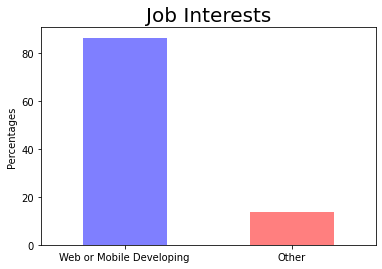

In [5]:
web_or_mobile = job_interest_no_null.str.contains('Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

import matplotlib.pyplot as plt
%matplotlib inline

freq_table.plot.bar(color=['b','r'], alpha=0.5, rot=0)
plt.title('Job Interests', fontsize=20)
plt.ylabel('Percentages')
plt.xticks([0,1], ['Web or Mobile Developing', 'Other'])
plt.show()

Just over 86% of participants are interested in working in web or mobile developing, which is a good indicator that our sample has the right categories of people we're interested in.

### Where Are These New Coders Located?

Now that we know our sample is a good fit for our purpose, our next task is to find where these new coders are located and how many people are in each location?

Our dataset has two variables (columns) that describe the location of the participants, the **CountryCitizen**  (gives the country of origin) and **CountryLive** (tells us where the participant live). Because we want to run ads, we'll will use the **CountryLive** variable.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

In our case, the two best countries means the countries with the most potential customers.

To answer our question "where are these new coders located", we'll generate a frequency table of the **CountryLive** variable that describes both absolute and relative frequencies.

First we'll drop all rows where participants didn't answer what role they're interested in, to make sure we're working with a representative sample. It's better to leave them out, as we're not sure what their interests are.

In [6]:
# Drop rows that didn't answer what role their interested in.
gd_coders_survey = coders_survey[coders_survey['JobRoleInterest'].notnull()].copy()

# Generate absolute and relative frequencies for 'CountryLive'
absolute_freq = gd_coders_survey['CountryLive'].value_counts()
relative_freq = gd_coders_survey['CountryLive'].value_counts(normalize=True) * 100

# Create df of frequencies
countrylive_freqs = pd.DataFrame({'Absolute': absolute_freq, 'Percentages': relative_freq})
countrylive_freqs

,Absolute,Percentages
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The majority of new coders are located in the United States 45.7%, which makes it the best country to advertise our product in so far. India comes in second making up 7.7%, followed by United Kingdom 4.6% and Canada 3.8%.

### How much money new coders are willing to spend on learning?

So far we have gained some useful information about where our new coders live. We still need to answer our third question though - "How much money new coders are willing to spend on learning?"

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.

- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

To carry out our analysis, we'll first create a new column that describes how much money students spend per month on learning to the moment the survey was taken.

We'll create the new column by dividing the **MoneyForLearning** column by the **MonthsProgramming** column.

Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, we'll replace all the values of 0 with 1.

In [7]:
# Replace 0 for 1 in the 'MonthsProgramming' column.
gd_coders_survey['MonthsProgramming'] = gd_coders_survey['MonthsProgramming'].replace(0,1)

# create new column 'SpentPerMonth'
gd_coders_survey['SpentPerMonth'] = gd_coders_survey['MoneyForLearning'] / gd_coders_survey['MonthsProgramming']

# Check null values 'SpentPerMonth'
gd_coders_survey['SpentPerMonth'].isnull().sum()

675

In [8]:
# Drop rows with null values in both the 'SpentPerMonth' and 'CountryLive' columns
gd_coders_survey = gd_coders_survey[gd_coders_survey['SpentPerMonth'].notnull()]
gd_coders_survey = gd_coders_survey[gd_coders_survey['CountryLive'].notnull()]

# Group dataset by 'CountryLive' and find the avg 'SpentPerMonth' for countries of interest.
countries_of_interest = ['United States of America', 'India', 'United Kingdom', 'Canada']

mean_countries = gd_coders_survey.groupby(['CountryLive']).mean()
mean_countries['SpentPerMonth'][countries_of_interest]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpentPerMonth, dtype: float64

At first glance the results look a bit off. Intuitively, considering the wealth of these individual countries you would expect participants from the United Kingdom and Canada to spend more per month than India.

It might be the case we have outliers, causing the mean to be higher in India and lower in the United Kingdom and Canada, or perhaps our data is not a good representation, or the results might be correct.

### Checking for Outliers

Lets create box plots for the countries of interest to check for extreme outliers.

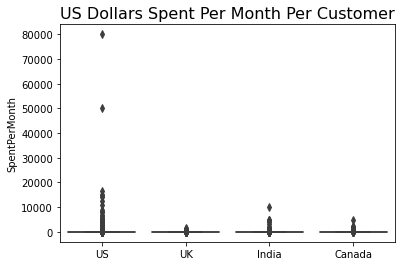

In [9]:
# Filter the df to just the countries of interest
target_countries = gd_coders_survey[gd_coders_survey['CountryLive'].isin(countries_of_interest)]

import seaborn as sns
sns.boxplot(x='CountryLive', y='SpentPerMonth', data= target_countries)
plt.xlabel("")
plt.xticks(range(4), ['US','UK','India','Canada'])
plt.title('US Dollars Spent Per Month Per Customer', fontsize=16)

plt.show()

The only extreme outliers that are clearly visable are those for the United States. Lets eliminate these and recalculate the mean for the monthly spend per country and plot the box plots again. 

In [10]:
# Keep only data that has a spend per month less than $20000
gd_coders_survey = gd_coders_survey[gd_coders_survey['SpentPerMonth'] < 20000]

# Recalculate the mean spent per month by country
mean_countries = gd_coders_survey.groupby(['CountryLive']).mean()

mean_countries['SpentPerMonth'][countries_of_interest]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpentPerMonth, dtype: float64

Lets replot the box plots

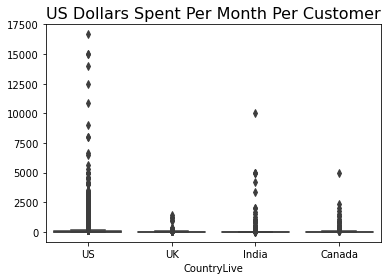

In [11]:
# Again filter data to just countries of interest
target_countries = gd_coders_survey[gd_coders_survey['CountryLive'].isin(countries_of_interest)]

# Plot box plots

sns.boxplot(x='CountryLive', y='SpentPerMonth', data=target_countries)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.ylabel("")
plt.title('US Dollars Spent Per Month Per Customer', fontsize=16)
plt.show()

We can now see that India has some extreme ouliers as well. However we're not sure if these figures are accurate or not, India's outliers range somewhere between 2500 and 10000. If these participants have taken bootcamps, these figures could be justified as bootcamps can be very expensive.

Lets isolate the dataset around these individuals to have a closer look.

In [12]:
# Isolating India's outliers

india_outliers = target_countries[(target_countries['CountryLive'] == 'India') & (target_countries['SpentPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

None of the individuals above attended bootcamp. The original question in the survey related to the **MoneyForLearning** column was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?". 

So it is unclear where they spent so much money. To be on the safe side we'll just remove these individuals.

In [13]:
# Remove outliers from India
target_countries = target_countries.drop(india_outliers.index)

Looking at the box plots above we can see that the United States is still showing extreme outliers. Some individuals are claiming to have spent over $6000 per month on learning to code.

Lets have a closer look.

In [14]:
us_outliers = target_countries[(target_countries['CountryLive'] == 'United States of America') &
                              (target_countries['SpentPerMonth'] > 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

From the United States outliers there are some that attended bootcamp, which can account for the $6000 plus they paid on training, so we'll remove the ones that didn't attend bootcamp. Also a few that did attend bootcamp said they've been coding for 3 months or less (the **MonthsProgramming** variable). We'll remove these rows aswell, as the money spent on learning (most likely for the bootcamp) was probably spread over more than three months which makes their **SpentPerMonth** incorrect (**'SpentPerMonth'** was calculated by dividing **'MoneyForLearning'** by **'MonthsProgramming'**).

Lets remove the mentioned rows.

In [15]:
no_bootcamp = target_countries[(target_countries['CountryLive'] == 'United States of America') &
                              (target_countries['AttendedBootcamp'] == 0) &
                              (target_countries['SpentPerMonth'] >= 6000)]

# Drop US >= $6000 no bootcamp.
target_countries = target_countries.drop(no_bootcamp.index)

less_than_3 = target_countries[(target_countries['CountryLive'] == 'United States of America') &
                              (target_countries['SpentPerMonth'] >= 6000)&
                              (target_countries['MonthsProgramming'] <= 3)]

# Drop US >= $6000 & only 3 months programming.
target_countries = target_countries.drop(less_than_3.index)

Finally, we'll have a look at that supicious unit in the Canada boxplot above $3000

In [16]:
target_countries[(target_countries['CountryLive'] == 'Canada') & (target_countries['SpentPerMonth'] > 3000)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The individual attended bootcamp but only has 2 months programming, so will drop it.

In [17]:
target_countries.drop(13659, inplace=True)

In [18]:
# recompute the mean values for 'SpentPerMonth'

country_means = target_countries.groupby(['CountryLive']).mean()

country_means['SpentPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: SpentPerMonth, dtype: float64

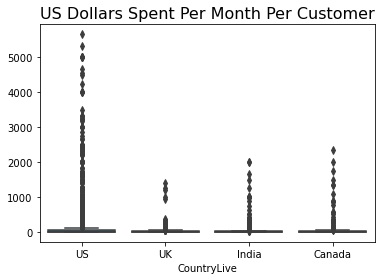

In [19]:
# Plot distribution again
sns.boxplot(x='CountryLive', y='SpentPerMonth', data=target_countries)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.ylabel("")
plt.title('US Dollars Spent Per Month Per Customer', fontsize=16)
plt.show()

In [20]:
# frequencies for 'CountryLive'
percentages = target_countries['CountryLive'].value_counts(normalize=True) * 100
absolute = target_countries['CountryLive'].value_counts()

freqs = pd.DataFrame({'Absolute': absolute, 'Percentages': percentages})
freqs

,Absolute,Percentages
United States of America,2920,74.967908
India,457,11.732991
United Kingdom,279,7.163030
Canada,239,6.136072


The United States spent the most money on average per month for learning $142, and makes up 74\% of the sample. So it makes sense to advertise in the United States.

It's hard to choose between India and Canada, new coders from both countries spend on average more than 59 dollars a  
month, which is the subsciption for our courses, though Canada spends more, 93 dollars versus India's 65 dollars, but the potential customer reach from  india is more than Canada, India has roughly twice as many potential customers than Canada.

So far the options I would reccomend are:

- Allocate 100\% of the advertising budget to the United States.
- Split the budget proportionally beween the United States, Canada and India, say:
  - 50\% United States, 25\% Canada, 25\% India
  - 60\% United states, 20\% Canada, 20\% India
  
With this unclear certainty, it might be best to send the analysis to the marketing team, so they can use their domain knowledge to help make a decision.

## Conclusion

After analyzing the dataset provided by freeCodeCamp we can only confidently select the United States to advertise our e-learning courses. The second choice is shared between Canada and India, but have decided it would be best that the marketing team help make the final
decision.